In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report


---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv(
    Path('/Users/jgthomas/Documents/GitHub/credit-risk-classification/Credit_Risk/lending_data.csv')
)
# Review the DataFrame
pd.set_option('display.max_columns', None)
display(df.head())
display(df.tail())

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


In [3]:
print(df.shape)

(77536, 8)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB
None


In [5]:
print(df.describe())

          loan_size  interest_rate  borrower_income  debt_to_income  \
count  77536.000000   77536.000000     77536.000000    77536.000000   
mean    9805.562577       7.292333     49221.949804        0.377318   
std     2093.223153       0.889495      8371.635077        0.081519   
min     5000.000000       5.250000     30000.000000        0.000000   
25%     8700.000000       6.825000     44800.000000        0.330357   
50%     9500.000000       7.172000     48100.000000        0.376299   
75%    10400.000000       7.528000     51400.000000        0.416342   
max    23800.000000      13.235000    105200.000000        0.714829   

       num_of_accounts  derogatory_marks    total_debt   loan_status  
count     77536.000000      77536.000000  77536.000000  77536.000000  
mean          3.826610          0.392308  19221.949804      0.032243  
std           1.904426          0.582086   8371.635077      0.176646  
min           0.000000          0.000000      0.000000      0.000000  
25%  

In [6]:
print(df.index)

RangeIndex(start=0, stop=77536, step=1)


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [7]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
X = df.drop(columns='loan_status')

In [8]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [9]:
# Review the X variable DataFrame
X[:5]

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [10]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [11]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(solver='newton-cg', random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [12]:
# Make a prediction using the testing data
testing_predictions = lr_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [13]:
# Generate a confusion matrix for the model
test_matrix = confusion_matrix(y_test, testing_predictions)
tn, fp, fn, tp = confusion_matrix(y_test, testing_predictions).ravel() 

print(test_matrix)
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp} ")

[[18660   105]
 [   41   578]]
TN: 18660, FP: 105, FN: 41, TP: 578 


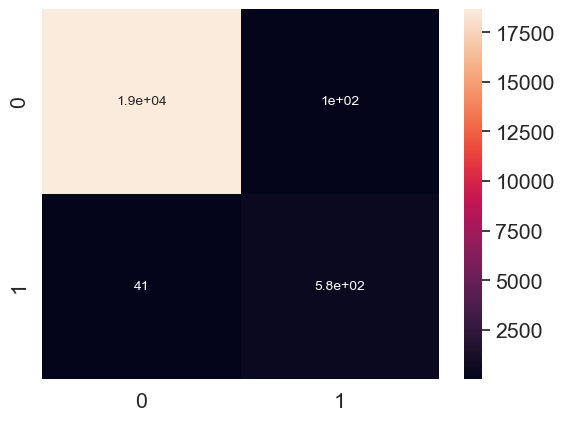

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(test_matrix, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10})
plt.show()

In [16]:
# Print the classification report for the model
testing_report = classification_report(y_test, testing_predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.93      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.96      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** From our confusion matrix we can see that there were:
                - 578 instances where the model predicted the unfavorable loans correctly,
                - 18,660 instances where the model predicted the FAVORABLE loans correctly,
                - 105 instances where the model predicted unfavorable loans incorrectly. Loans were actually FAVORABLE but predicted as unfavorable, and
                - 41 instances where the model predicted FAVORABLE loan incorrectly. Loans were actually unfavorable but predicted as FAVORABLE.

Conclusion from the confusion matrix:
    I would conclude that this model would be conservative in nature and could be used as a guideline of deciding a yes/no decision on a loan. I like this model as a "feel good" test that a loan committe could use when deciding on loan amounts that were deemed material. For "small" loans where a customer is getting an approval over the internet, I would say 41 instances where the model predicted FAVORABLE when it should have been unfavorable would be an acceptable amount of risk to take.

Classification report conclusion:
    The model performed well in precision and f1 for favorable loans, 100% and 100%, but for unfavorable loans precision was at 85%. i believe this would be considered a reliable model based on the 85%. Any farther South of that figure and we would probably test further.

    

---